<a href="https://colab.research.google.com/github/rohit28900/Epilepsy_project/blob/main/LSTM_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.metrics import cohen_kappa_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dropout

In [2]:
d = pd.read_csv("/content/data_comp.csv", index_col=0)

In [3]:
d.head()

,Mean Variance,PSD Delta,PSD Theta,PSD Alpha,PSD Beta,PSD Gamma,Label
0,1.063623e-09,6803.705628,1088.536540,276.516785,37.114802,36.482136,1
1,1.311105e-09,5486.911334,2131.881992,139.811807,149.476963,334.945798,1
2,2.029157e-09,12903.033643,1996.041708,136.940630,133.463115,227.643655,1
3,3.702044e-09,10878.246633,957.557670,108.993285,64.010655,79.691697,1
4,1.063623e-09,406.554541,142.041811,196.992531,26.481469,2.325851,0


In [4]:
X = d.iloc[:, :-1].values
y = d.iloc[:, -1].values

In [5]:
X

array([[1.06362305e-09, 6.80370563e+03, 1.08853654e+03, 2.76516785e+02,
        3.71148017e+01, 3.64821357e+01],
       [1.31110548e-09, 5.48691133e+03, 2.13188199e+03, 1.39811807e+02,
        1.49476963e+02, 3.34945798e+02],
       [2.02915712e-09, 1.29030336e+04, 1.99604171e+03, 1.36940630e+02,
        1.33463115e+02, 2.27643655e+02],
       ...,
       [8.27478182e-10, 4.10461991e+02, 9.12538286e+01, 1.84604099e+01,
        5.87045165e+00, 1.64970102e+00],
       [6.70255799e-10, 2.40244999e+02, 5.92967296e+01, 1.73037371e+01,
        5.69161304e+00, 2.03518339e+00],
       [6.01071389e-10, 3.38760021e+02, 8.23101547e+01, 3.60822111e+01,
        8.85893433e+00, 1.91297665e+00]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
X_train

array([[-0.68197179, -0.62192336, -0.53319276, -0.49243916, -0.33582202,
        -0.39039437],
       [-0.29373576, -0.30715157, -0.06379523, -0.30858885, -0.6125811 ,
        -0.60334351],
       [-0.86381171, -0.72481267, -0.69037788, -0.63913325, -0.65937801,
        -0.59597754],
       ...,
       [-0.26084955,  1.49447919,  5.65987275,  3.38349202,  0.61208899,
         0.19843914],
       [-0.38421453, -0.62838918, -0.40858449,  0.11651266, -0.63020781,
        -0.6032912 ],
       [-0.849641  , -0.38736464, -0.30479075,  0.13788991, -0.27370188,
        -0.42530617]])

In [9]:
X_train = X_train.reshape(X_train.shape[0],6 , 1)

In [10]:
X_train

array([[[-0.68197179],
        [-0.62192336],
        [-0.53319276],
        [-0.49243916],
        [-0.33582202],
        [-0.39039437]],

       [[-0.29373576],
        [-0.30715157],
        [-0.06379523],
        [-0.30858885],
        [-0.6125811 ],
        [-0.60334351]],

       [[-0.86381171],
        [-0.72481267],
        [-0.69037788],
        [-0.63913325],
        [-0.65937801],
        [-0.59597754]],

       ...,

       [[-0.26084955],
        [ 1.49447919],
        [ 5.65987275],
        [ 3.38349202],
        [ 0.61208899],
        [ 0.19843914]],

       [[-0.38421453],
        [-0.62838918],
        [-0.40858449],
        [ 0.11651266],
        [-0.63020781],
        [-0.6032912 ]],

       [[-0.849641  ],
        [-0.38736464],
        [-0.30479075],
        [ 0.13788991],
        [-0.27370188],
        [-0.42530617]]])

In [11]:
X_test = X_test.reshape(X_test.shape[0],6 , 1)

In [12]:
X_test.shape

(703, 6, 1)

In [13]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [14]:
tf.random.set_seed(69)

In [20]:
lstm = keras.Sequential()

In [21]:
lstm.add(keras.layers.LSTM(20,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))

In [22]:
lstm.add(keras.layers.LSTM(10, return_sequences=False, recurrent_activation='relu'))

In [23]:
lstm.add(keras.layers.Dense(3,activation="relu"))

In [24]:
lstm.add(keras.layers.Dense(1,activation="sigmoid"))

In [25]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])

In [26]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 20)             1760      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 3,037
Trainable params: 3,037
Non-trainable params: 0
_________________________________________________________________


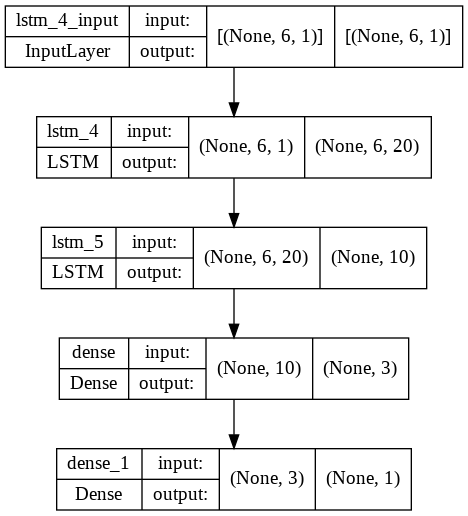

In [27]:
from keras.utils.vis_utils import plot_model

plot_model(lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
start = time.time()
his = lstm.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/100
66/66 [==============================] - 5s 22ms/step - loss: 0.6736 - true_positives: 0.0000e+00 - true_negatives: 1917.0000 - false_positives: 0.0000e+00 - false_negatives: 192.0000 - accuracy: 0.9090 - val_loss: 0.6532 - val_true_positives: 0.0000e+00 - val_true_negatives: 633.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 70.0000 - val_accuracy: 0.9004
Epoch 2/100
66/66 [==============================] - 1s 11ms/step - loss: 0.5826 - true_positives: 0.0000e+00 - true_negatives: 1917.0000 - false_positives: 0.0000e+00 - false_negatives: 192.0000 - accuracy: 0.9090 - val_loss: 0.3712 - val_true_positives: 0.0000e+00 - val_true_negatives: 633.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 70.0000 - val_accuracy: 0.9004
Epoch 3/100
66/66 [==============================] - 1s 11ms/step - loss: 0.2849 - true_positives: 0.0000e+00 - true_negatives: 1916.0000 - false_positives: 1.0000 - false_negatives: 192.0000 - accuracy: 0.9085 - val_loss: 0.256

In [29]:
start = time.time()
pred = lstm.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.4152495861053467s


In [30]:
pred.shape

(703, 1)

In [31]:
for i in range(len(pred)):
    if pred[i] <0.5:
        pred[i]=0
    else:
        pred[i]=1

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[629   4]
 [ 12  58]]


0.9772403982930299

In [34]:
plt.figure(figsize = (20,12))
plt.boxplt(range(703),pred,c='r')
plt.line(range(703),y_test,c='b')
plt.show()

TypeError: ignored

<Figure size 1440x864 with 0 Axes>

In [35]:
cohen_kappa_score(y_test,pred)

0.8662798991868372

In [36]:
train_loss = his.history['loss']
test_loss = his.history['val_loss']

In [37]:
epoch_count = range(1, len(train_loss) + 1)

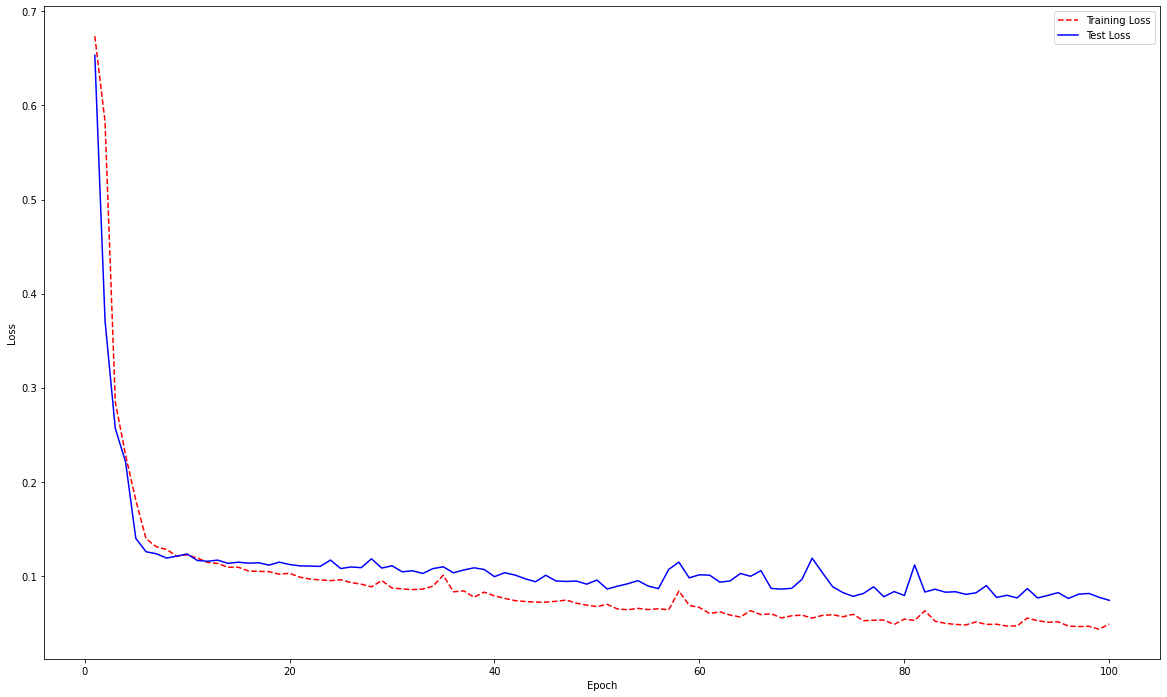

In [38]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('Epoch_loss.png')
plt.show();


In [39]:
acc_loss = his.history['accuracy']
test_acc_loss = his.history['val_accuracy']

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count, acc_loss, 'r--')
plt.plot(epoch_count, test_acc_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();